In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('Loan_Default.csv')

In [2]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
# drop some columns
df = df.drop(['year', 'Gender', 'construction_type', 'occupancy_type',
              'Secured_by', 'age', 'total_units', 'co-applicant_credit_type',
              'Region', 'submission_of_application'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      148670 non-null  int64  
 1   loan_limit              145326 non-null  object 
 2   approv_in_adv           147762 non-null  object 
 3   loan_type               148670 non-null  object 
 4   loan_purpose            148536 non-null  object 
 5   Credit_Worthiness       148670 non-null  object 
 6   open_credit             148670 non-null  object 
 7   business_or_commercial  148670 non-null  object 
 8   loan_amount             148670 non-null  int64  
 9   rate_of_interest        112231 non-null  float64
 10  Interest_rate_spread    112031 non-null  float64
 11  Upfront_charges         109028 non-null  float64
 12  term                    148629 non-null  float64
 13  Neg_ammortization       148549 non-null  object 
 14  interest_only       

In [5]:
df.isnull().sum()

ID                            0
loan_limit                 3344
approv_in_adv               908
loan_type                     0
loan_purpose                134
Credit_Worthiness             0
open_credit                   0
business_or_commercial        0
loan_amount                   0
rate_of_interest          36439
Interest_rate_spread      36639
Upfront_charges           39642
term                         41
Neg_ammortization           121
interest_only                 0
lump_sum_payment              0
property_value            15098
income                     9150
credit_type                   0
Credit_Score                  0
LTV                       15098
Security_Type                 0
Status                        0
dtir1                     24121
dtype: int64

In [6]:
# Mean Imputation
df['rate_of_interest'] = df['rate_of_interest'].fillna(df['rate_of_interest'].mean())
df['Interest_rate_spread'] = df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean())
df['Upfront_charges'] = df['Upfront_charges'].fillna(df['Upfront_charges'].mean())
df['term'] = df['term'].fillna(df['term'].mean())
df['property_value'] = df['property_value'].fillna(df['property_value'].mean())
df['income'] = df['income'].fillna(df['income'].mean())
df['LTV'] = df['LTV'].fillna(df['LTV'].mean())
df['dtir1'] = df['dtir1'].fillna(df['dtir1'].mean())

# check null values
df.isnull().sum()

ID                           0
loan_limit                3344
approv_in_adv              908
loan_type                    0
loan_purpose               134
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization          121
interest_only                0
lump_sum_payment             0
property_value               0
income                       0
credit_type                  0
Credit_Score                 0
LTV                          0
Security_Type                0
Status                       0
dtir1                        0
dtype: int64

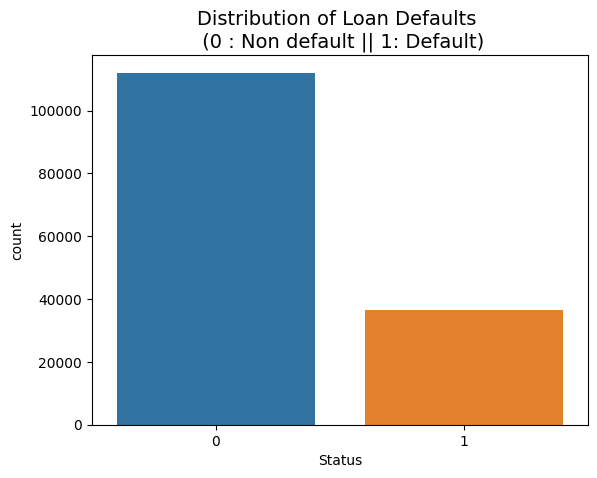

In [7]:
# visualize status
sns.countplot(x='Status', data=df)
plt.title('Distribution of Loan Defaults \n (0 : Non default || 1: Default)',
          fontsize=14)
plt.show()

In [8]:
# check count of defaulters and non-defaulters
print(df['Status'].value_counts()[0], ' are non-defaulters')
print(df['Status'].value_counts()[1], ' are defaulters')

# percentage wise
print('\n')
print(round(df['Status'].value_counts()[0]/len(df) * 100, 2), '% are non-defaulters')
print(round(df['Status'].value_counts()[1]/len(df) * 100, 2), '% are defaulters')

112031  are non-defaulters
36639  are defaulters


75.36 % are non-defaulters
24.64 % are defaulters


In [9]:
# quantitative variables summary
df.describe()

,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,99224.500000,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,1.839093e+05,0.487764,0.445359,2784.133285,58.401029,3.411696e+05,6293.492004,115.875857,37.883839,0.430942,9.652119
min,24890.000000,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.297872,0.000000,33.000000
50%,99224.500000,2.965000e+05,4.045476,0.441656,3224.996127,360.000000,4.580000e+05,6000.000000,699.000000,73.026316,0.000000,37.732932
75%,136391.750000,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,0.000000,44.000000
max,173559.000000,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [10]:
# check categorical columns and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'Categorical columns are: {cat_cols}\n')
print(f'Numerical columns are: {num_cols}')

Categorical columns are: ['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'credit_type', 'Security_Type']

Numerical columns are: ['ID', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


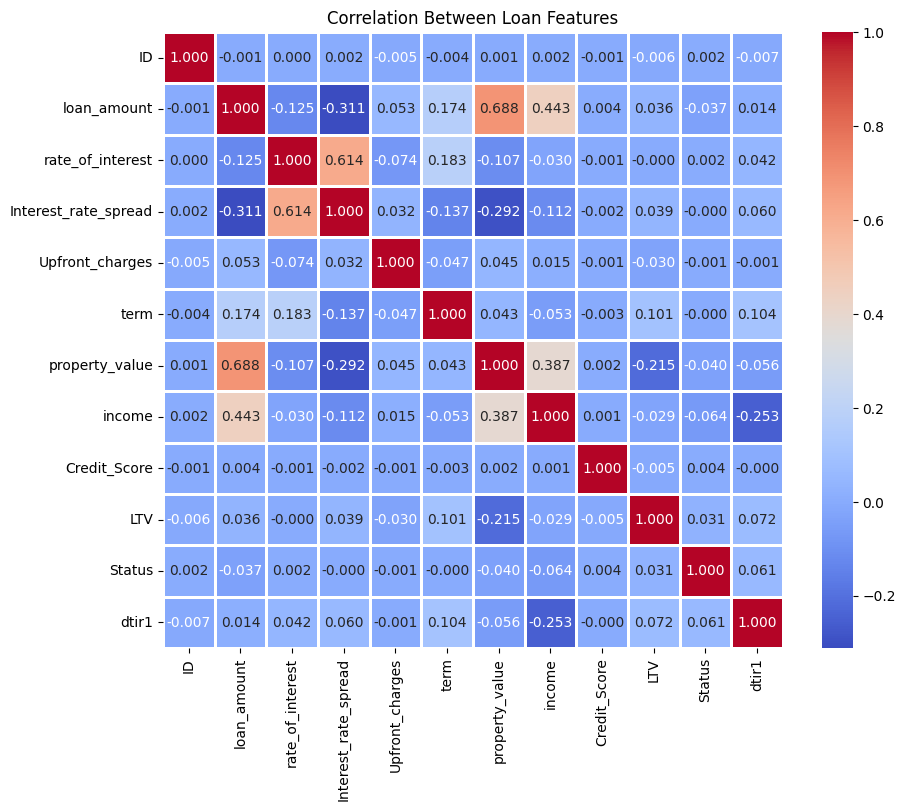

In [11]:
# heatmap to visualize correlation amongst variables
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=True, fmt='.3f',
            linewidths=2)
plt.title('Correlation Between Loan Features', fontsize=12)
plt.show()

# Transforming Categorical Data cols

In [12]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Label Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoder = LabelEncoder()

for col in cat_cols:
    if col in df_encoded.columns:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Display the transformed DataFrame
df_encoded.head(20)



,ID,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,interest_only,lump_sum_payment,property_value,income,credit_type,Credit_Score,LTV,Security_Type,Status,dtir1
0,24890,0,1,0,1,0,0,1,116500,4.045476,...,1,1,1.180000e+05,1740.000000,3,758,98.728814,1,1,45.000000
1,24891,0,1,1,1,0,0,0,206500,4.045476,...,1,0,4.978935e+05,4980.000000,2,552,72.746457,1,1,37.732932
2,24892,0,2,0,1,0,0,1,406500,4.560000,...,1,1,5.080000e+05,9480.000000,3,834,80.019685,1,0,46.000000
3,24893,0,1,0,4,0,0,1,456500,4.250000,...,1,1,6.580000e+05,11880.000000,3,587,69.376900,1,0,42.000000
4,24894,0,2,0,1,0,0,1,696500,4.000000,...,1,1,7.580000e+05,10440.000000,1,602,91.886544,1,0,39.000000
5,24895,0,2,0,1,0,0,1,706500,3.990000,...,1,1,1.008000e+06,10080.000000,3,864,70.089286,1,0,40.000000
6,24896,0,2,0,3,0,0,1,346500,4.500000,...,1,1,4.380000e+05,5040.000000,3,860,79.109589,1,0,44.000000
7,24897,1,1,0,4,0,0,1,266500,4.125000,...,1,1,3.080000e+05,3780.000000,0,863,86.525974,1,0,42.000000
8,24898,0,1,0,3,0,0,1,376500,4.875000,...,1,1,4.780000e+05,5580.000000,0,580,78.765690,1,0,44.000000
9,24899,0,1,2,3,0,0,1,436500,3.490000,...,1,1,6.880000e+05,6720.000000,0,788,63.444767,1,0,30.000000


In [13]:
df


,ID,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,interest_only,lump_sum_payment,property_value,income,credit_type,Credit_Score,LTV,Security_Type,Status,dtir1
0,24890,cf,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,...,not_int,not_lpsm,118000.000000,1740.0,EXP,758,98.728814,direct,1,45.000000
1,24891,cf,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,...,not_int,lpsm,497893.465696,4980.0,EQUI,552,72.746457,direct,1,37.732932
2,24892,cf,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,not_int,not_lpsm,508000.000000,9480.0,EXP,834,80.019685,direct,0,46.000000
3,24893,cf,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,not_int,not_lpsm,658000.000000,11880.0,EXP,587,69.376900,direct,0,42.000000
4,24894,cf,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,not_int,not_lpsm,758000.000000,10440.0,CRIF,602,91.886544,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,cf,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,...,not_int,not_lpsm,608000.000000,7860.0,CIB,659,71.792763,direct,0,48.000000
148666,173556,cf,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,...,not_int,not_lpsm,788000.000000,7140.0,CIB,569,74.428934,direct,0,15.000000
148667,173557,cf,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,...,not_int,not_lpsm,728000.000000,6900.0,CIB,702,61.332418,direct,0,49.000000
148668,173558,cf,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,...,not_int,not_lpsm,278000.000000,7140.0,EXP,737,70.683453,direct,0,29.000000


In [14]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df_encoded['scaled_upfront_charges'] = rob_scaler.fit_transform(df_encoded['Upfront_charges'].values.reshape(-1,1))
df_encoded['scaled_income'] = rob_scaler.fit_transform(df_encoded['income'].values.reshape(-1,1))
df_encoded['scaled_LTV'] = rob_scaler.fit_transform(df_encoded['LTV'].values.reshape(-1,1))


df_encoded = df_encoded.drop(['income', 'Upfront_charges', 'LTV'], axis=1)


In [15]:
df_encoded.isnull().sum()

ID                        0
loan_limit                0
approv_in_adv             0
loan_type                 0
loan_purpose              0
Credit_Worthiness         0
open_credit               0
business_or_commercial    0
loan_amount               0
rate_of_interest          0
Interest_rate_spread      0
term                      0
Neg_ammortization         0
interest_only             0
lump_sum_payment          0
property_value            0
credit_type               0
Credit_Score              0
Security_Type             0
Status                    0
dtir1                     0
scaled_upfront_charges    0
scaled_income             0
scaled_LTV                0
dtype: int64

# Balance Target variable

In [16]:
# checking count
print('Non-defaulters are',df['Status'].value_counts()[0], ' of the dataset')
print('Defaulters are', df['Status'].value_counts()[1] , ' of the dataset')

Non-defaulters are 112031  of the dataset
Defaulters are 36639  of the dataset


In [17]:
# performing undersampling to balance data

# shuffle dataset
shuffled_df = df_encoded.sample(frac=1, random_state=4)

# randomly select default sample size from non-default sample size
non_def_df = shuffled_df.loc[shuffled_df['Status'] == 0].sample(n=36639,
                                                                random_state=42)

# separate all default class
default_df = shuffled_df.loc[shuffled_df['Status'] == 1]

# concatenate separated dataframes
balanced_df = pd.concat([default_df, non_def_df])

balanced_df.head()

,ID,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,lump_sum_payment,property_value,credit_type,Credit_Score,Security_Type,Status,dtir1,scaled_upfront_charges,scaled_income,scaled_LTV
122907,147797,0,1,0,3,0,0,1,116500,4.045476,...,1,118000.000000,0,896,1,1,43.000000,0.0,-0.243243,1.199686
37852,62742,0,1,0,3,0,0,1,486500,4.045476,...,1,678000.000000,3,592,1,1,46.000000,0.0,1.202703,-0.059332
33545,58435,0,1,2,3,0,0,1,466500,4.045476,...,1,497893.465696,2,872,1,1,37.732932,0.0,0.716216,-0.013063
18658,43548,0,1,2,3,0,0,1,196500,4.045476,...,1,228000.000000,0,541,1,1,38.000000,0.0,-0.405405,0.614156
100675,125565,0,1,0,1,1,0,1,186500,4.045476,...,1,497893.465696,2,784,1,1,37.732932,0.0,-0.513514,-0.013063


In [18]:
# checking count
print('Non-defaulters are', balanced_df['Status'].value_counts()[0], ' of the dataset')
print('Defaulters are', balanced_df['Status'].value_counts()[1] , ' of the dataset')

Non-defaulters are 36639  of the dataset
Defaulters are 36639  of the dataset


# Training the Model

In [19]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score,f1_score,roc_curve

In [20]:
# create feature and target dataset
X = balanced_df.drop('Status', axis=1) # features
y = balanced_df['Status'] # target

# split dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

X

,ID,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,interest_only,lump_sum_payment,property_value,credit_type,Credit_Score,Security_Type,dtir1,scaled_upfront_charges,scaled_income,scaled_LTV
122907,147797,0,1,0,3,0,0,1,116500,4.045476,...,1,1,118000.000000,0,896,1,43.000000,0.000000,-0.243243,1.199686
37852,62742,0,1,0,3,0,0,1,486500,4.045476,...,1,1,678000.000000,3,592,1,46.000000,0.000000,1.202703,-0.059332
33545,58435,0,1,2,3,0,0,1,466500,4.045476,...,1,1,497893.465696,2,872,1,37.732932,0.000000,0.716216,-0.013063
18658,43548,0,1,2,3,0,0,1,196500,4.045476,...,1,1,228000.000000,0,541,1,38.000000,0.000000,-0.405405,0.614156
100675,125565,0,1,0,1,1,0,1,186500,4.045476,...,1,1,497893.465696,2,784,1,37.732932,0.000000,-0.513514,-0.013063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75439,100329,2,1,0,3,0,0,1,206500,4.375000,...,1,1,338000.000000,1,588,1,49.000000,-0.085242,-0.770270,-0.556920
26232,51122,0,1,0,3,0,0,1,76500,5.190000,...,1,1,148000.000000,0,792,1,37.000000,-0.270217,-0.351351,-0.995929
21857,46747,0,1,0,3,0,0,1,366500,4.750000,...,1,1,488000.000000,1,501,1,44.000000,-1.221823,-0.202703,0.096906
68877,93767,0,2,0,1,0,0,1,176500,3.990000,...,0,1,228000.000000,0,657,1,26.000000,0.274221,-0.472973,0.204719


In [21]:
y

122907    1
37852     1
33545     1
18658     1
100675    1
         ..
75439     0
26232     0
21857     0
68877     0
95010     0
Name: Status, Length: 73278, dtype: int64

In [22]:
# train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [23]:
# test the model
y_pred = model.predict(X_test)

# Evaluating the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10964
           1       1.00      1.00      1.00     11020

    accuracy                           1.00     21984
   macro avg       1.00      1.00      1.00     21984
weighted avg       1.00      1.00      1.00     21984



Text(50.722222222222214, 0.5, 'Actual')

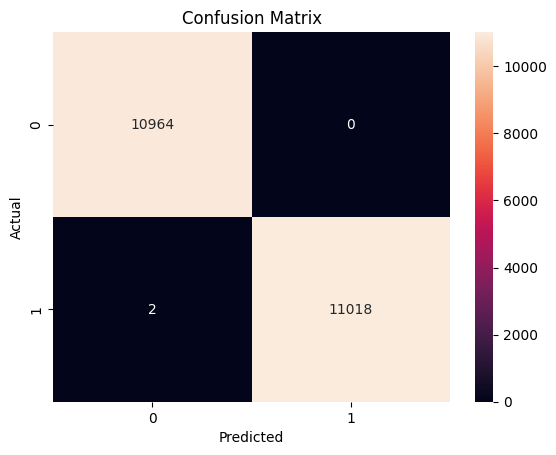

In [24]:
# plot confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, fmt=".0f", annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
# Try oversampling method

#Oversampling using SMOTE

from imblearn.over_sampling import SMOTE
import numpy as np

#instantiate
smote = SMOTE(random_state=42)

#apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#count of each class

print(np.bincount(y_train_resampled))


[25675 25675]


In [26]:
# Initialize the model
clf = RandomForestClassifier(random_state=1)

# Train the model
clf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=1)

In [27]:
y_pred = clf.predict(X_test)


In [28]:
print(f"RF train accuracy: {clf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {clf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 1.000


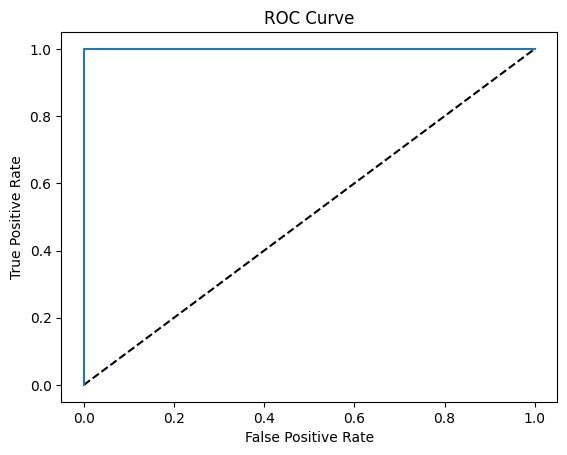

In [29]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [30]:
# Training with KNN
from sklearn.neighbors import KNeighborsClassifier

# create KNN classifier instance
knn = KNeighborsClassifier(n_neighbors=5)

# fit/train model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
# Test the model
y_pred = knn.predict(X_test)


# print out accuracy
print(f"KNN train accuracy: {knn.score(X_train, y_train):.3f}")
print(f"KNN test accuracy: {knn.score(X_test, y_test):.3f}")

KNN train accuracy: 0.779
KNN test accuracy: 0.680


In [32]:
# Evaluate report

print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70     10964
           1       0.71      0.62      0.66     11020

    accuracy                           0.68     21984
   macro avg       0.68      0.68      0.68     21984
weighted avg       0.68      0.68      0.68     21984



In [33]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# set parameters
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

# cross validate instance
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# print best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy: 0.6820737041101075


In [34]:
# Hyperparameter tuning with oversampled balanced dataset

# set parameters
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

# cross validate instance
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# print best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy: 0.681966893865628


In [35]:
# save file
import pickle

# Specify filename
filename = 'loan_default_randfrst_model.sav'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {filename}")


Model saved as loan_default_randfrst_model.sav
